<a href="https://colab.research.google.com/github/CodesHassan/Breast-Cancer-Classification/blob/main/breast_cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv("breast-cancer.csv")
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
data["diagnosis"] = data["diagnosis"].apply(lambda x: 0 if x == "B" else 1)

X = data.drop(["id","diagnosis"], axis=1)

y = data["diagnosis"]

In [ ]:
from sklearn.preprocessing import StandardScaler

st=StandardScaler()
X=pd.DataFrame(st.fit_transform(X),columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(
    solver='liblinear',
    C=1.0,
    max_iter=1000,
    random_state=42,
    penalty="l1"
)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print(log_reg.score(X_train,y_train)*100,log_reg.score(X_test,y_test)*100)
# Classification Report for all models
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))

98.9648033126294 97.67441860465115

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.97      0.97      0.97        32

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86



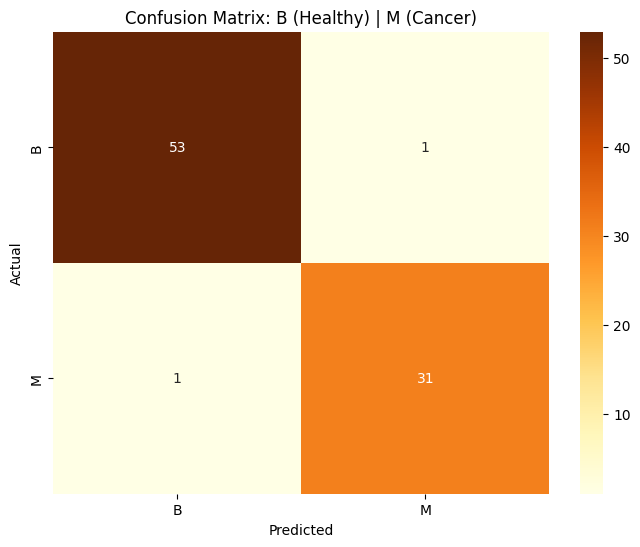

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: B (Healthy) | M (Cancer)')
plt.show()

In [ ]:
new_data=pd.DataFrame({
    "Original_pred": y_test,
    "Prediction": y_pred_log
})

new_data

,Original_pred,Prediction
204,0,0
70,1,1
131,1,1
431,0,0
540,0,0
...,...,...
333,0,0
86,1,1
250,1,1
274,1,1
